# Graduation Project: Thesis

In [ ]:
#從 drive上載入file
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
drive.mount('/content/gdrive')
transactions_train_df = pd.read_csv("/content/gdrive/My Drive/code_files/transactions_train.csv")
articles_df = pd.read_csv("/content/gdrive/My Drive/code_files/article_data.csv")
customer_df = pd.read_csv("/content/gdrive/My Drive/code_files/customers.csv")

Mounted at /content/gdrive


In [ ]:
# merge transactions_train & article_data on 'article_id' --> transactions_train_df_new
transactions_train_df_new = pd.merge(transactions_train_df, articles_df, on='article_id', how='left')
transactions_train_df_new.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,541518,Rae Push (Melbourne) 2p,306,Bra,Underwear
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,505221,Inca Jumper,252,Sweater,Garment Upper body
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body


In [ ]:
transactions_train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   t_dat               object 
 1   customer_id         object 
 2   article_id          int64  
 3   price               float64
 4   sales_channel_id    int64  
 5   product_code        int64  
 6   prod_name           object 
 7   product_type_no     int64  
 8   product_type_name   object 
 9   product_group_name  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.4+ GB


In [ ]:
transactions_train_df_new['t_dat'] = pd.to_datetime(transactions_train_df_new['t_dat'])

In [ ]:
#SDt
start_date_t = pd.to_datetime('2020-07-01')
end_date_t = pd.to_datetime('2020-08-31')

df_t = transactions_train_df_new[(transactions_train_df_new['t_dat'] >= start_date_t) & (transactions_train_df_new['t_dat'] < end_date_t)]

In [ ]:
#SDt+1
start_date_t1 = pd.to_datetime('2020-09-01')
end_date_t1 = pd.to_datetime('2020-09-22')

df_t1 = transactions_train_df_new[(transactions_train_df_new['t_dat'] >= start_date_t1) & (transactions_train_df_new['t_dat'] < end_date_t1)]

In [ ]:
# Retain specific columns
df_t = df_t[['t_dat', 'customer_id', 'article_id', 'product_code', 'product_type_no']]
df_t1 = df_t1[['t_dat', 'customer_id', 'article_id', 'product_code', 'product_type_no']]

### Descriptive statistics

In [ ]:
!pip install squarify


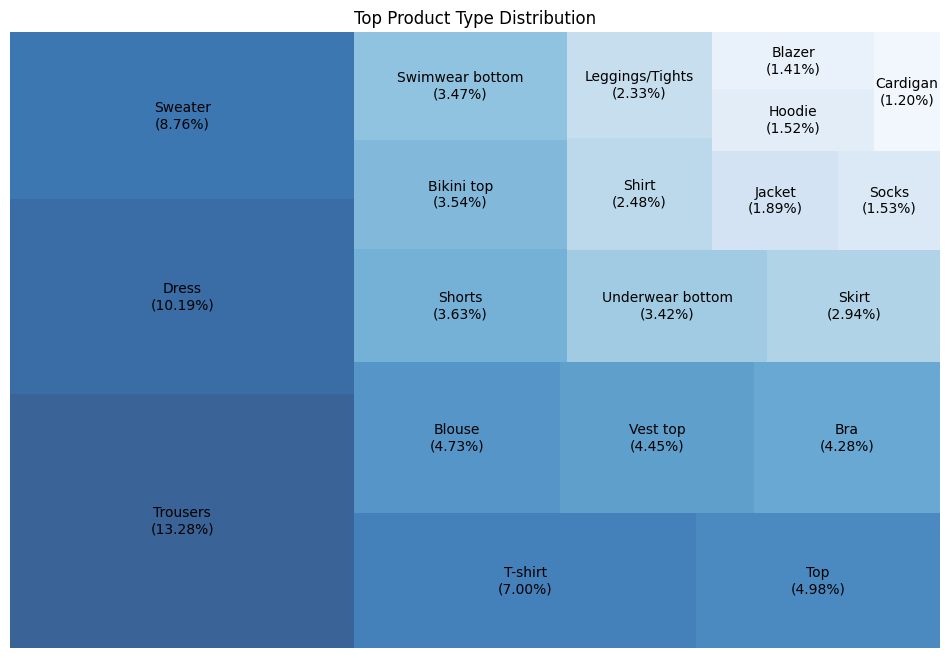

In [ ]:
#Top product type distribution
import squarify
import seaborn as sns

product_type_counts = transactions_train_df_new['product_type_name'].value_counts()
threshold = 1.0
filtered_counts = product_type_counts[product_type_counts / product_type_counts.sum() * 100 >= threshold]
percentages = (filtered_counts / product_type_counts.sum()) * 100
color = sns.color_palette("Blues", n_colors=len(percentages))[::-1]

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=percentages,
    label=[f"{i}\n({v:.2f}%)" for i, v in zip(filtered_counts.index, percentages)],
    alpha=0.8,
    color=color
)
plt.title('Top Product Type Distribution')
plt.axis('off')
plt.savefig("Tree chart of product type name category share.jpg", dpi=600)
plt.show()



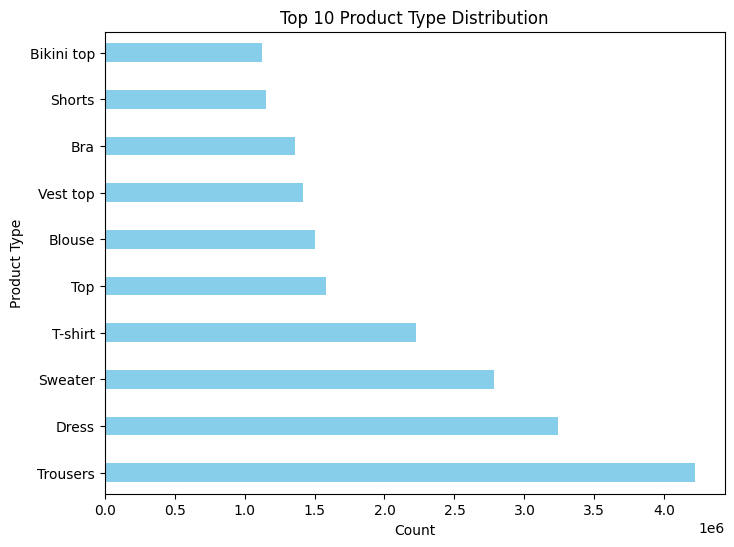

In [ ]:
# Top 5 product types
top5_product_types = transactions_train_df_new['product_type_name'].value_counts().nlargest(10)
color = 'skyblue'

plt.figure(figsize=(8, 6))
top5_product_types.plot(kind='barh', color=color, width=0.4)
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.title('Top 10 Product Type Distribution')
plt.savefig("Top 10 Product Type Distribution.jpg", dpi=600)
plt.show()


<ipython-input-79-74a7dfbd2550>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sweater_data['date'] = pd.to_datetime(sweater_data['t_dat'])


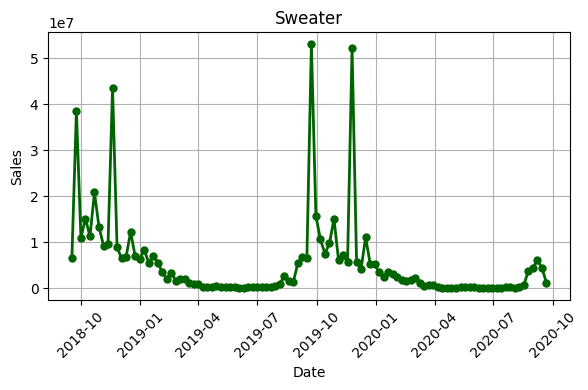

In [ ]:
# Sales status of the product at different times - Sweater
sweater_data = transactions_train_df_new[transactions_train_df_new['product_type_name'] == 'Sweater']
sweater_data['date'] = pd.to_datetime(sweater_data['t_dat'])

daily_count = sweater_data.groupby('date').size().rename('quantity')
sweater_data = sweater_data.merge(daily_count, on='date')
sweater_data['sales'] = sweater_data['price'] * sweater_data['quantity']
sweater_data = sweater_data.sort_values('date')
sweater_data['week'] = sweater_data['date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_sales = sweater_data.groupby('week')['sales'].sum().reset_index()
plt.figure(figsize=(6, 4))
plt.plot(weekly_sales['week'], weekly_sales['sales'], color='darkgreen', linewidth=2, marker='o', markersize=5, linestyle='-')
plt.title('Sweater')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.savefig("Sweater.jpg", dpi=600)
plt.show()


<ipython-input-78-7dc82bb4e30a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dress_data['date'] = pd.to_datetime(dress_data['t_dat'])


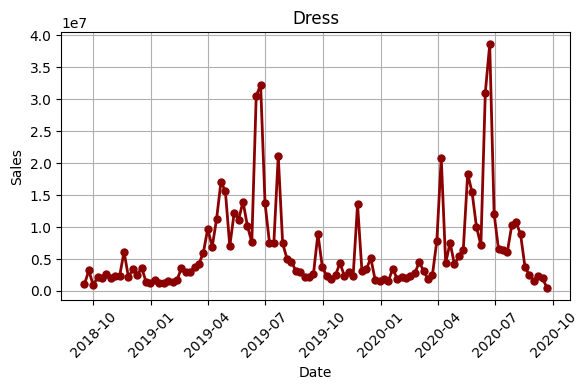

In [ ]:
# Sales status of the product at different times - Dress
dress_data = transactions_train_df_new[transactions_train_df_new['product_type_name'] == 'Dress']
dress_data['date'] = pd.to_datetime(dress_data['t_dat'])

daily_count = dress_data.groupby('date').size().rename('quantity')
dress_data = dress_data.merge(daily_count, on='date')
dress_data['sales'] = dress_data['price'] * dress_data['quantity']
dress_data = dress_data.sort_values('date')
dress_data['week'] = dress_data['date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_sales = dress_data.groupby('week')['sales'].sum().reset_index()
plt.figure(figsize=(6, 4))
plt.plot(weekly_sales['week'], weekly_sales['sales'], color='darkred', linewidth=2, marker='o', markersize=5, linestyle='-')
plt.title('Dress')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.savefig("Dress.jpg", dpi=600)
plt.show()


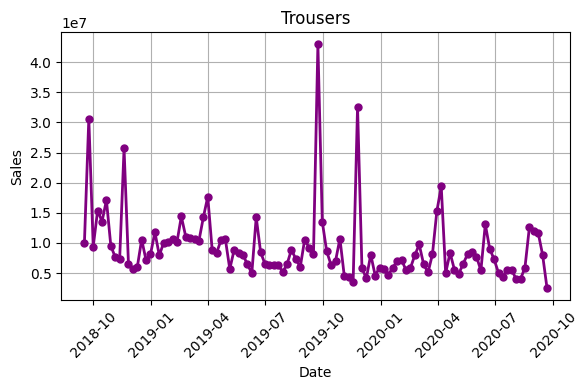

In [ ]:
# Sales status of the product at different times - Trousers
trousers_data = transactions_train_df_new[transactions_train_df_new['product_type_name'] == 'Trousers']
trousers_data['date'] = pd.to_datetime(dress_data['t_dat'])

daily_count = trousers_data.groupby('date').size().rename('quantity')
trousers_data = trousers_data.merge(daily_count, on='date')
trousers_data['sales'] = trousers_data['price'] * trousers_data['quantity']
trousers_data = trousers_data.sort_values('date')
trousers_data['week'] = trousers_data['date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_sales = trousers_data.groupby('week')['sales'].sum().reset_index()
plt.figure(figsize=(6, 4))
plt.plot(weekly_sales['week'], weekly_sales['sales'], color='purple', linewidth=2, marker='o', markersize=5, linestyle='-')
plt.title('Trousers')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.savefig("Trousers.jpg", dpi=600)
plt.show()


## GSP

In [ ]:
!pip install gsp_python

In [ ]:
# gsp
from gsp_python.gsp import load_ds
from gsp_python.gsp import GSP
algo_gsp = GSP(shopping_lists, minsup=0.01)
output = algo_gsp.run_gsp()
# print(output)

# DataFrame
output_data = pd.DataFrame(output, columns=['sequence', 'counts'])

In [ ]:
output_data.sort_values(by='counts', ascending=False)

,sequence,counts
4,[[272]],127932
3,[[265]],127287
1,[[255]],104777
6,[[254]],79572
11,[[253]],75839
...,...,...
347,"[[253, 265, 275]]",4140
176,"[[254], [286]]",4140
304,"[[265], [265], [255]]",4139
327,"[[272], [254, 272]]",4125


In [ ]:
'''
# min-sup
plt.figure(figsize=(10, 5))
plt.plot(results_df['support_threshold'], results_df['num_frequent_patterns'], marker='o')
plt.title('optimal min_sup')
plt.xlabel('min_sup')
plt.ylabel('frequent patterns')
plt.grid(True)

plt.savefig("minsup_npatterns.jpg", dpi=600)
plt.show()
'''

## Similarity - LCS

In [ ]:
#%% LCS

def longest_common_subsequence(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if seq1[i - 1] == seq2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp[m][n]

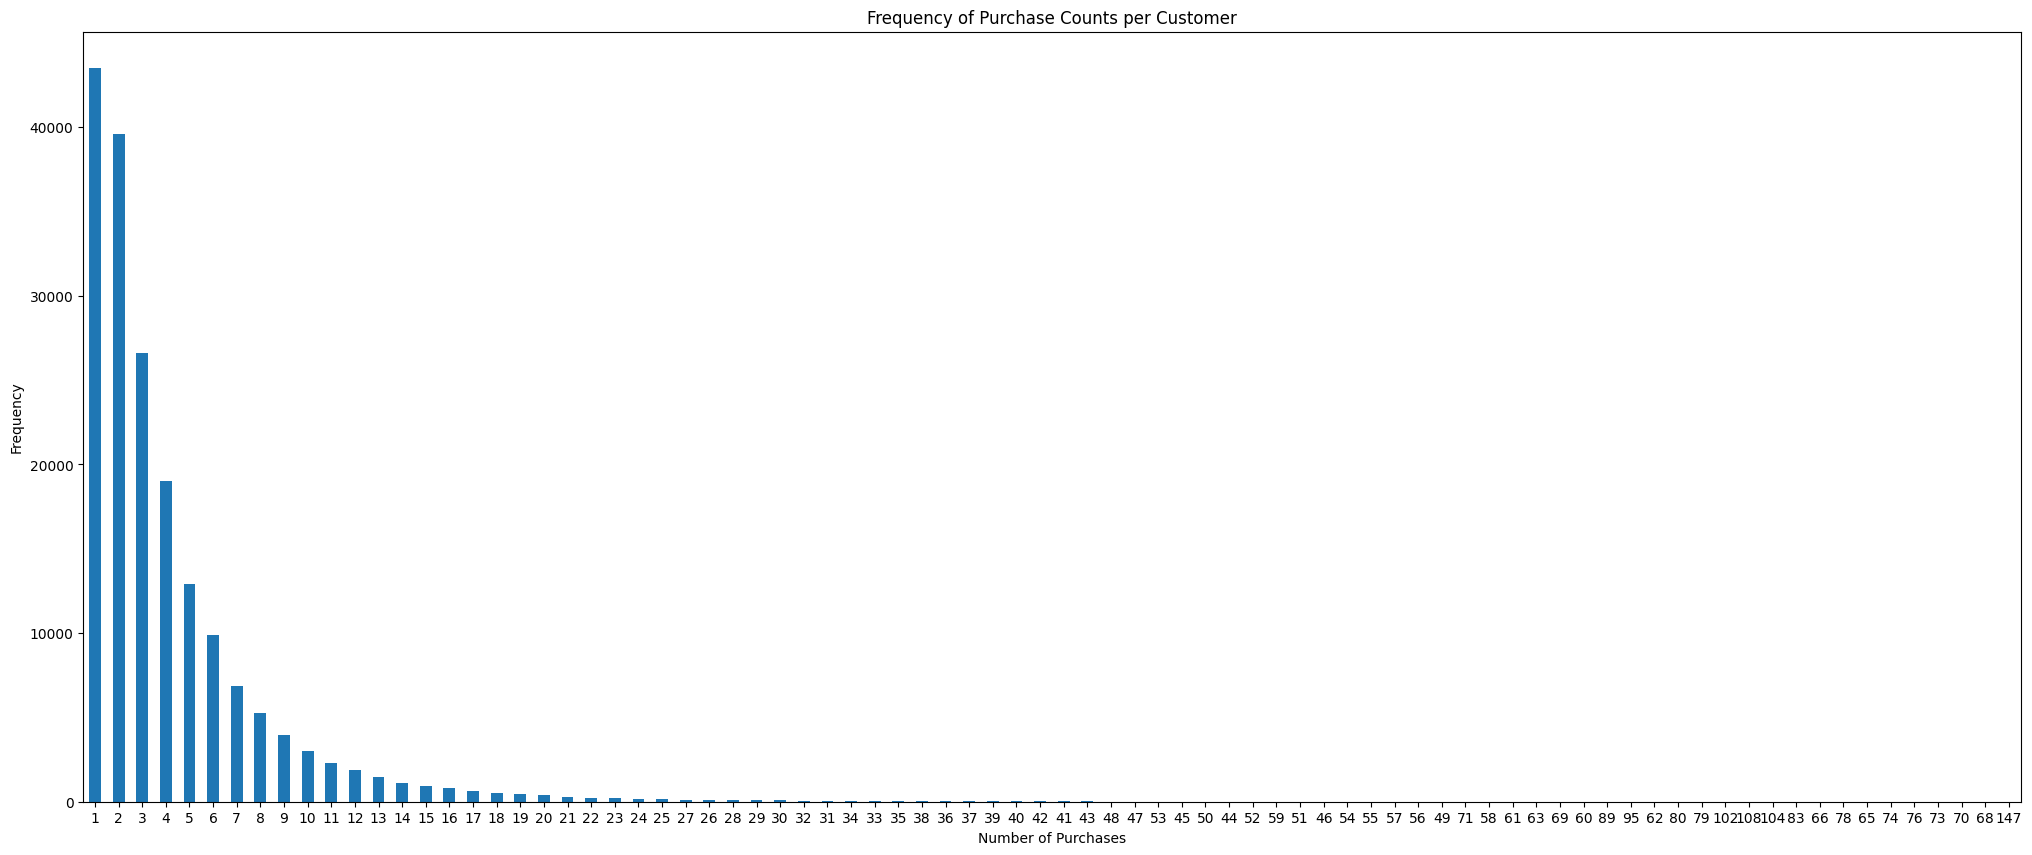

In [ ]:
# Frequency distribution of purchases
frequency_distribution = purchase_frequency.value_counts()

# Plotting the frequency distribution
plt.figure(figsize=(25, 10))
frequency_distribution.plot(kind='bar')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.title('Frequency of Purchase Counts per Customer')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

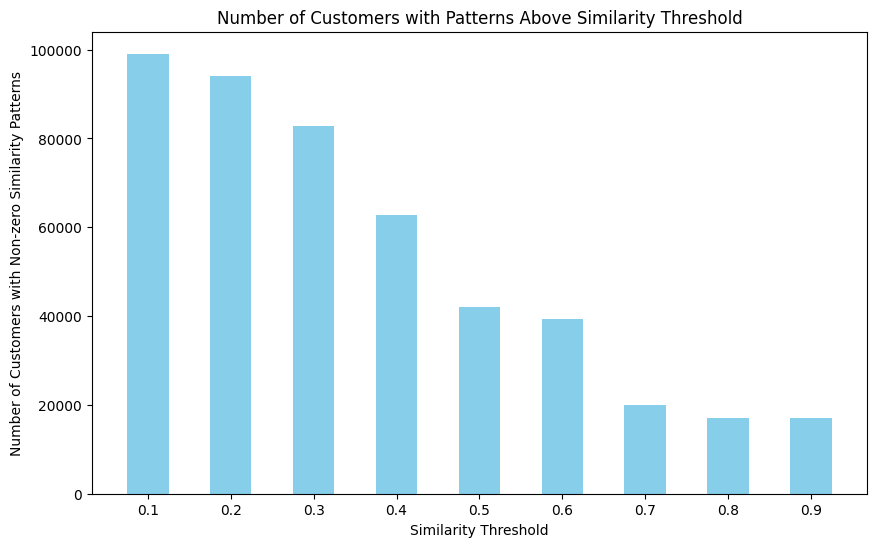

In [ ]:
'''
# Similarity - why 0.1? (data-driven)
similarity_ranges = np.arange(0.1, 1, 0.1)
customer_counts = []

for threshold in similarity_ranges:
    count = 0
    for index, row in df_similarities.iterrows():
        non_zero_patterns = row[row > threshold]
        if not non_zero_patterns.empty:
            count += 1
    customer_counts.append(count)

plt.figure(figsize=(10, 6))
plt.bar(similarity_ranges, customer_counts, width=0.05, color='skyblue', align='center')
plt.xlabel('Similarity Threshold')
plt.ylabel('Number of Customers with Non-zero Similarity Patterns')
plt.title('Number of Customers with Patterns Above Similarity Threshold')
plt.xticks(similarity_ranges)
plt.savefig("Number of Customers with Patterns Above Similarity Threshold.jpg", dpi=600)
plt.show()
'''

In [ ]:
# Personalized recommendations
recommendation_list['Detailed Recommended Products'] = recommendation_list['Recommended Products'].apply(lambda x: convert_recommendations(x, product_type_to_article_ids))
recommendation_list.tail()

,Customer ID,Customer,Recommended Products,Detailed Recommended Products
99129,fffcc686584b3388a3afe410e3555e3557f556382b2f60...,Customer 100216,"[252, 252, 252, 252, 255, 255, 255, 255, 255, ...","[593184001, 667144001, 691184001, 526260004, 7..."
99130,fffd0248a95c2e49fee876ff93598e2e20839e51b9b767...,Customer 100217,"[255, 255, 265, 265, 258, 254, 254, 259, 275, ...","[684021088, 874264001, 829581001, 905853002, 6..."
99131,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,Customer 100218,"[255, 255, 265, 265, 258, 259, 275, 253, 306, ...","[398559008, 661364001, 644700002, 889181001, 8..."
99132,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,Customer 100219,"[252, 252, 252, 252, 252, 265, 265, 272, 272, ...","[579148006, 694143001, 673677002, 698317005, 8..."
99133,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,Customer 100220,"[255, 255, 272, 272, 258, 254, 254, 275, 253, ...","[556260002, 575172002, 491912004, 816591015, 7..."
